In [1]:
start_date = '2018-05-01'
end_date = '2019-12-31'

# 1. Importing the Dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset_path = '../../dataset/'

In [4]:
df_news = pd.read_csv(dataset_path + '/news/cointelegraph.com [only_btc] [no_time].csv', index_col='date', parse_dates=True)
df_price = pd.read_csv(dataset_path + '/price/btc_usd_daily.csv', index_col='date', parse_dates=True)

In [5]:
df_news = df_news[start_date:end_date]

In [6]:
df_news

,headline,source
date,,
2019-12-31,"Vexed Tech Entrepreneur Turns Bitcoin Hacker, ...",https://cointelegraph.com/news/vexed-tech-entr...
2019-12-31,Bitcoin 2020 — Blockchain's New Year Resolutions,https://cointelegraph.com/news/bitcoin-2020-bl...
2019-12-31,XRP Price Lost 66% Against BTC in 2019 — Will ...,https://cointelegraph.com/news/xrp-price-lost-...
2019-12-31,Ethereum Network Overcame Intentional Attack A...,https://cointelegraph.com/news/ethereum-networ...
2019-12-31,BitMEX Ends Year With Additional 13K BTC in It...,https://cointelegraph.com/news/bitmex-ends-yea...
...,...,...
2018-05-01,"Crypto Markets Experience Slight Correction, B...",https://cointelegraph.com/news/crypto-markets-...
2018-05-01,ASIC Resistance: Will Ethereum Join Monero Aga...,https://cointelegraph.com/news/asic-resistance...
2018-05-01,CFTC Chairman On Crypto Regulation: ‘I Don’t S...,https://cointelegraph.com/news/cftc-chairman-o...


In [7]:
df_news.shape

(4816, 2)

In [8]:
df_price

,open,close,high,low,change,volume,market_cap
date,,,,,,,
2020-03-24,6436.64,6734.80,6789.02,6411.07,4.63,48221910672,123148917787
2020-03-23,5831.37,6416.31,6443.93,5785.00,10.03,46491916000,117314776187
2020-03-22,6185.56,5830.25,6359.70,5823.71,-5.74,40099664740,106591196069
2020-03-21,6206.52,6185.07,6378.14,5932.82,-0.35,42494390880,113068192795
2020-03-20,6191.65,6198.78,6844.26,5865.78,0.12,54442976103,113309245860
...,...,...,...,...,...,...,...
2013-05-03,106.25,97.75,108.13,79.10,-8.00,0,1085995169
2013-05-02,116.38,105.21,125.60,92.28,-9.60,0,1168517495
2013-05-01,139.00,116.99,139.89,107.72,-15.83,0,1298954594


In [9]:
df_price.shape

(2522, 7)

# 2. Data Cleaning and Preprocessing

In [10]:
from textblob import TextBlob

In [11]:
df_news['polarity'] = df_news.apply(lambda x: TextBlob(x['headline']).sentiment.polarity, axis=1)
df_news['subjectivity'] = df_news.apply(lambda x: TextBlob(x['headline']).sentiment.subjectivity, axis=1)

In [12]:
df_news

,headline,source,polarity,subjectivity
date,,,,
2019-12-31,"Vexed Tech Entrepreneur Turns Bitcoin Hacker, ...",https://cointelegraph.com/news/vexed-tech-entr...,0.000000,0.000000
2019-12-31,Bitcoin 2020 — Blockchain's New Year Resolutions,https://cointelegraph.com/news/bitcoin-2020-bl...,0.136364,0.454545
2019-12-31,XRP Price Lost 66% Against BTC in 2019 — Will ...,https://cointelegraph.com/news/xrp-price-lost-...,0.000000,0.000000
2019-12-31,Ethereum Network Overcame Intentional Attack A...,https://cointelegraph.com/news/ethereum-networ...,0.000000,0.000000
2019-12-31,BitMEX Ends Year With Additional 13K BTC in It...,https://cointelegraph.com/news/bitmex-ends-yea...,0.000000,0.000000
...,...,...,...,...
2018-05-01,"Crypto Markets Experience Slight Correction, B...",https://cointelegraph.com/news/crypto-markets-...,-0.166667,0.166667
2018-05-01,ASIC Resistance: Will Ethereum Join Monero Aga...,https://cointelegraph.com/news/asic-resistance...,0.000000,1.000000
2018-05-01,CFTC Chairman On Crypto Regulation: ‘I Don’t S...,https://cointelegraph.com/news/cftc-chairman-o...,0.000000,0.000000


In [13]:
df_sentiment = df_news.groupby(by='date').mean()

In [14]:
df_sentiment

,polarity,subjectivity
date,,
2018-05-01,0.011905,0.202381
2018-05-02,0.030485,0.427697
2018-05-03,-0.043210,0.136728
2018-05-04,-0.013889,0.057540
2018-05-05,0.075000,0.183333
...,...,...
2019-12-27,0.042045,0.125568
2019-12-28,0.010038,0.297348
2019-12-29,0.086806,0.336111


In [15]:
filtered_polarity = df_sentiment['polarity'].apply(lambda x: 1 if x > 0.2 else (-1 if x < -0.2 else 0))
df_sentiment['filtered_polarity'] = filtered_polarity 

In [16]:
filtered_subjectivity = df_sentiment['subjectivity'].apply(lambda x: 1 if x > 0.2 else (-1 if x < -0.2 else 0))
df_sentiment['filtered_subjectivity'] = filtered_subjectivity

In [17]:
df_sentiment.head()

,polarity,subjectivity,filtered_polarity,filtered_subjectivity
date,,,,
2018-05-01,0.011905,0.202381,0,1
2018-05-02,0.030485,0.427697,0,1
2018-05-03,-0.043210,0.136728,0,0
2018-05-04,-0.013889,0.057540,0,0
2018-05-05,0.075000,0.183333,0,0


# 3. Data visualization

In [18]:
import seaborn as sns
sns.set(style='whitegrid', palette='Set2')

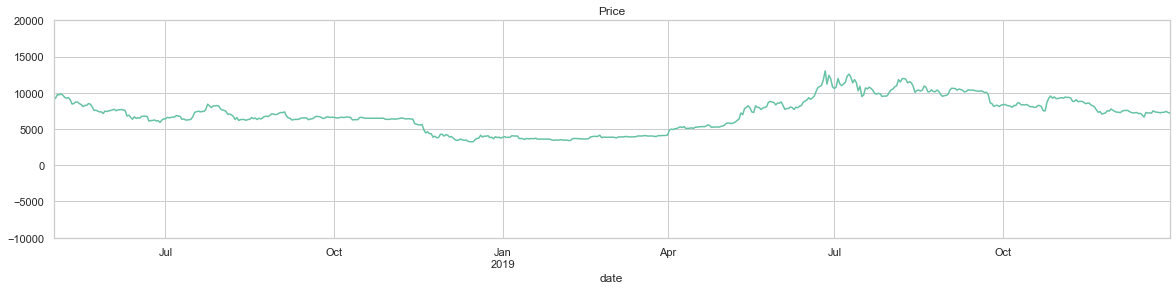

In [19]:
df_price['close'].plot(xlim=[start_date, end_date], figsize=(20, 4), ylim=[-10000, 20000], title='Price')

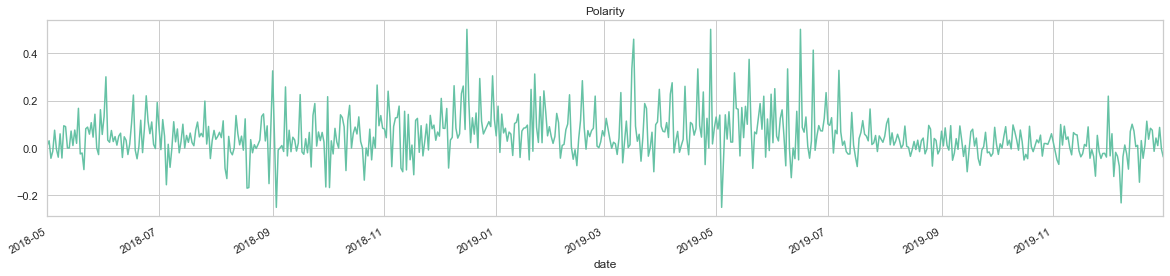

In [20]:
df_sentiment['polarity'].plot(xlim=[start_date, end_date], figsize=(20, 4), sharey=True, title='Polarity')

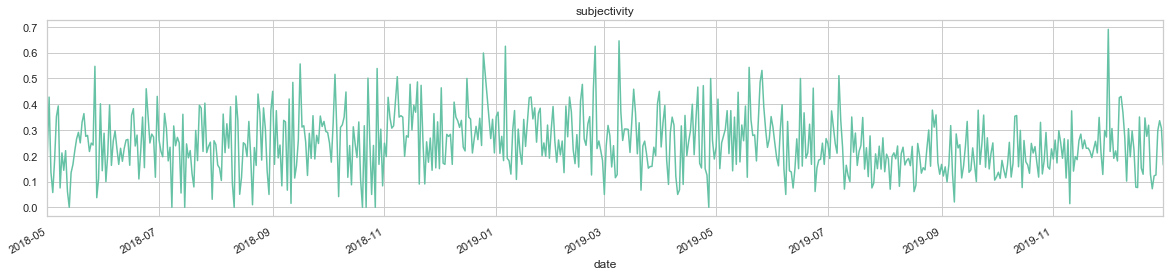

In [21]:
df_sentiment['subjectivity'].plot(xlim=[start_date, end_date], figsize=(20, 4), sharey=True, title='subjectivity')

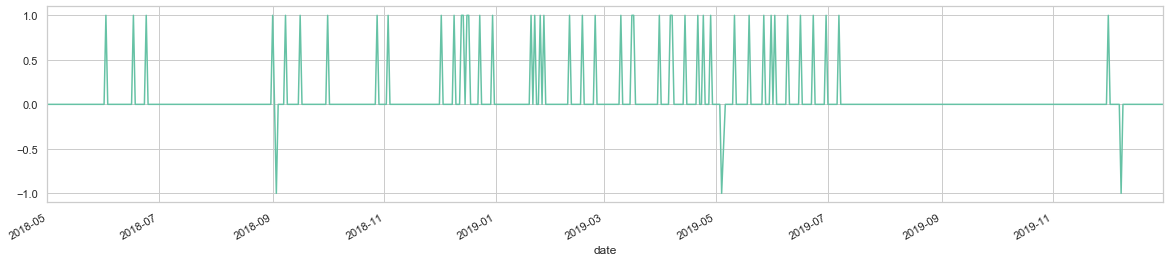

In [22]:
df_sentiment['filtered_polarity'].plot(xlim=[start_date, end_date], figsize=(20, 4), sharey=True)

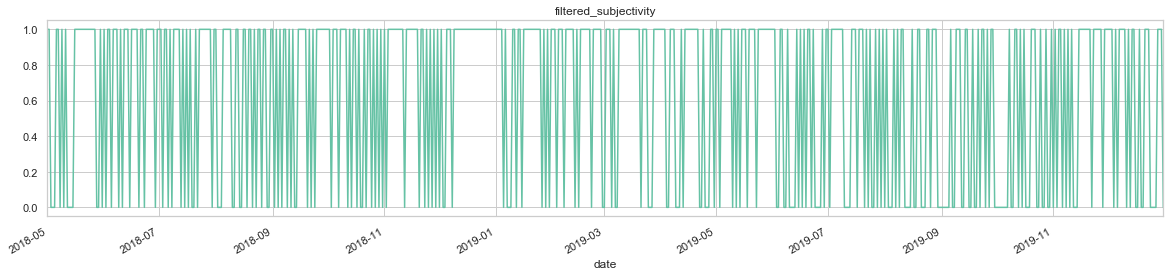

In [23]:
df_sentiment['filtered_subjectivity'].plot(xlim=[start_date, end_date], figsize=(20, 4), sharey=True, title='filtered_subjectivity')

# 4. Merging DataFrames

In [24]:
combined_data = pd.merge(df_sentiment, df_price, on='date', how='inner')
combined_data.head()

,polarity,subjectivity,filtered_polarity,filtered_subjectivity,open,close,high,low,change,volume,market_cap
date,,,,,,,,,,,
2018-05-01,0.011905,0.202381,0,1,9251.47,9119.01,9255.88,8891.05,-1.43,7713019904,155114132125
2018-05-02,0.030485,0.427697,0,1,9104.60,9235.92,9256.52,9015.14,1.44,7558159872,157119854754
2018-05-03,-0.043210,0.136728,0,0,9233.97,9743.86,9798.33,9188.15,5.52,10207299584,165778380092
2018-05-04,-0.013889,0.057540,0,0,9695.50,9700.76,9779.20,9585.96,0.05,8217829888,165062796742
2018-05-05,0.075000,0.183333,0,0,9700.28,9858.15,9964.50,9695.12,1.63,7651939840,167759953654


# 5. Writing the data into CSV file

In [25]:
combined_data.to_csv('combined_data.csv', index=True)